DSC160 Data Science and the Arts - Twomey - Spring 2020 - [dsc160.roberttwomey.com](http://dsc160.roberttwomey.com)

## Basic Image Stats

This notebook demonstrates how to read, write, and calculate simple statistics on digital images. 

It uses the [numpy](https://numpy.org/), [scikit-image](https://scikit-image.org/), and [matplotlib](https://matplotlib.org/) libraries. 

In [ ]:
%matplotlib inline

With this command, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

### Digital Images as Arrays of Numbers

Digital images are arrays of numbers (stored as floats, integers, etc.) with shape (Height, Width) and some number of image channels.

This section uses numpy to make a simple 9 x 15 pixel, single channel image (black and white), with values in a checkerboard.

In [1]:
import numpy as np

Create an empty array (zeros) to hold the image

In [2]:
check = np.zeros((9, 15))

Set every other position and every other row to be 1 (checkerboard pattern)

In [3]:
check[::2, 1::2] = 1
check[1::2, ::2] = 1

What is the shape of our image?

In [4]:
check.shape

(9, 15)

How many pixels are in our image (aka what is the resolution, in pixels?)

In [5]:
pixelcount = check.shape[0] * check.shape[1]
pixelcount

135

another way to do this is with .size

In [6]:
check.size

135

Display the image using matplotlib/pyplot

In [7]:
import matplotlib.pyplot as plt

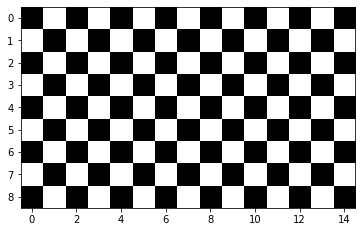

In [8]:
ax = plt.imshow(check, cmap='gray', interpolation='nearest') 

NOTE: The resulting image is 15 pixels wide by 9 pixels tall. In numpy indexing the first dimension corresponds to rows, and the second dimension corresponds to columns. This is different from how we usually think of images (and coordinates) as X, Y.

### Reading a Black and White Image

This section reads in a simple grayscale image from the skimage data dir and displays it.

In [9]:
from skimage import io
import skimage
import os

Read the input image

In [10]:
filename = os.path.join(skimage.data_dir, 'camera.png')
camera = io.imread(filename)

What is the width?

In [11]:
camera.shape

(512, 512)

What is the resolution?

In [12]:
pixelcount = camera.shape[0] * camera.shape[1]
pixelcount

262144

Display the image

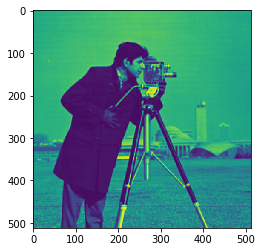

In [13]:
ax = plt.imshow(camera)

Why are the colors so strange? Pyplot is using a Blue-Green colormap (mapping grayscale to blue-green). 

Let's try again, specifying a grayscale colormap:

In [ ]:
ax = plt.imshow(camera, cmap='gray')

### Reading a Color Image

This section reads in an RGB (Red-Green-Blue) image and displays it

In [3]:
import scipy.misc

Read in a color image from the scipy miscellanous examples

In [4]:
face = scipy.misc.face()

What is the image shape?

In [5]:
face.shape

(768, 1024, 3)

NOTE: the image is 1024 pixels wide, 768 pixels tall, and has an additional 3 channels of information. Those three channels correspond to the Red, Blue, and Green color intensities of the image. This is the most typical format for color images. 

What is the data type of the pixels?

In [ ]:
face.dtype

Let's show the image

In [ ]:
ax = plt.imshow(face)

What is the resolution of the image?

In [ ]:
pixelcount = face.shape[0]*face.shape[1] # resolution
pixelcount

Technically there are 2,359,296 pixels (786432 * 3 channels), but we typically describe images based on their x and y resolution.

Finally, let's calculate some statistics. What are the max, mean, standard deviation and variance of the RGB values:

In [ ]:
np.max(face, axis=(0,1)) # max rgb value

In [ ]:
np.mean(face, axis=(0,1)) # mean rgb value

In [ ]:
np.std(face, axis=(0,1)) # standard deviation

In [ ]:
np.var(face, axis=(0,1)) # variance of rgb value

These are not particularly useful! We want to remap the image to some more useful format.

### Convert an RGB image to HSV (Hue, Saturation, Value)

This section takes an RGB image (red, green, blue) and converts it to a HSV image (hue, saturation, value). Whereas each channel in the original correspond to one of the above colors, here the first channel will correspond to the Hue (color), Saturation (how intense the color is from white to pure hue), and Value (how light or dark the image is).

### HSV Color space 

HSV is closer to how humans perceive color. It has three components: hue, saturation, and value. This color space describes colors (hue) in terms of their shade (saturation) and their brightness value.

#### Hue

Hue is the color portion of the model, expressed as a number on a circular color wheel. In terms of 0 to 360 degrees: 

- Red falls between 0 and 60 degrees.
- Yellow falls between 61 and 120 degrees.
- Green falls between 121-180 degrees.
- Cyan falls between 181-240 degrees.
- Blue falls between 241-300 degrees.
- Magenta falls between 301-360 degrees

#### Saturation
Saturation describes the amount of gray in a particular color, from 0 to 100 percent. Reducing this component toward zero introduces more gray and produces a faded effect. Sometimes, saturation appears as a range from just 0-1, where 0 is gray, and 1 is a primary color.

#### Value

Value works in conjunction with saturation and describes the brightness or intensity of the color, from 0-100 percent, where 0 is completely black, and 100 is the brightest and reveals the most color.

In [2]:
from skimage import data
from skimage.color import rgb2hsv

Convert our racoon image from RGB to HSV using the skimage rgb2hsv function

In [8]:
rgb_img = face
hsv_img = rgb2hsv(rgb_img)

Slice out the Hue, Saturation, and Value channels of our converted image:

In [21]:
hue_img = hsv_img[:, :, 0]
saturation_img = hsv_img[:,:, 1]
value_img = hsv_img[:, :, 2]

Display the H, S, V images:

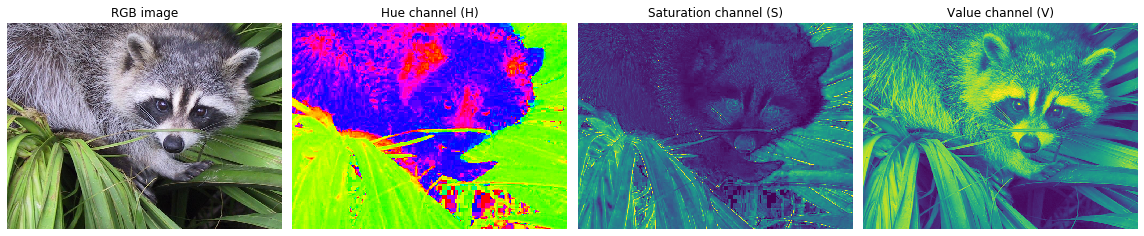

In [22]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(16, 8))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel (H)")
ax1.axis('off')
ax2.imshow(saturation_img)
ax2.set_title("Saturation channel (S)")
ax2.axis('off')
ax3.imshow(value_img)
ax3.set_title("Value channel (V)")
ax3.axis('off')

fig.tight_layout()

You can see the Hue channel looks like an extremely saturated version of whatever color that pixel has. The Saturation channel is darker for more grayscale parts of the image and lighter for more colorful parts of the image. The Value channel is light where the image is bright, and dark where the image is dark, independent of color.

What is the shape of one single channel of our new channels?

In [23]:
value_img.shape

(768, 1024)

Note numpy drops the third coordinate if we are dealing with a single channel image (whereas the RGB or HSV explicitly lists the third channel)

### Calculate Statistics on an HSV Image

Image statistics calculated on the Hue, Saturation, and Value (Brightness) are more useful for us in image analysis.

In [ ]:
np.max(hue_img)

In [ ]:
np.min(hue_img)

What is the average color (hue) of the image?

In [24]:
mean_hue = np.mean(hue_img, axis=(0,1))
mean_hue

0.4955136566503527

What is the average saturation of the image?

In [ ]:
mean_saturation = np.mean(saturation_img, axis=(0,1))
mean_saturation

What is the average value (brightness) of the image?

In [ ]:
mean_brightness = np.mean(value_img)
mean_brightness

What is the variange of the value channel?

In [ ]:
var_brightness = np.var(value_img) # variance of brightness channel
var_brightness

NOTE: we can do a manual rgb -> luminance (grayscale) conversion using rgb2gray method, and check how close the result is to the Value channel produced by the skimage rgb2hsv conversion.

The rgb2gray uses the following calculation:
$$Y = 0.2125 R + 0.7154 G + 0.0721B$$

from [https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_gray.html](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_gray.html)

In [ ]:
from skimage.color import rgb2gray

In [ ]:
gray_img = rgb2gray(face)
ax = plt.imshow(gray_img, cmap='gray')

One simple way to compare two images (and see where they differ) is to calculate their difference, in this case the Value image produced by the rgb2hsv function, and the rgb2gray above.

In [ ]:
diff = value_img - gray_img
ax = plt.imshow(diff, cmap="gray")

... this difference image just shows us that they gray image and value image are somewhat different. we will use the value image for our analysis

## References
- Scikit-image has a great [crash course on NumPy for images](https://scikit-image.org/docs/dev/user_guide/numpy_images.html)
- Scikit-image docs on [RGB to HSV conversion](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_hsv.html)